### Importamos las librerias que vamos a utilizar

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [45]:
# Importamos los datos
df = pd.read_excel('Datasets\BBDD_Hospitalización.xlsx', engine="openpyxl")
df.head(3)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0


-------------------------------

### Empezamos a anlaizar los datos

In [46]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

#### Valores duplicados

In [48]:
# Se filtran las filas duplicadas
df[df.duplicated(keep=False)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
36,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
37,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
39,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Se eliminan las filas duplicadas en todas las columnas manteniendo la primera aparición
df = df.drop_duplicates(subset=df.columns, keep='first')
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [50]:
# Se verifica que ya no hay filas duplicadas
df[df.duplicated(keep=False)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [51]:
# se resetean los indexs
df = df.reset_index(drop=True)

#### Valores Nulos

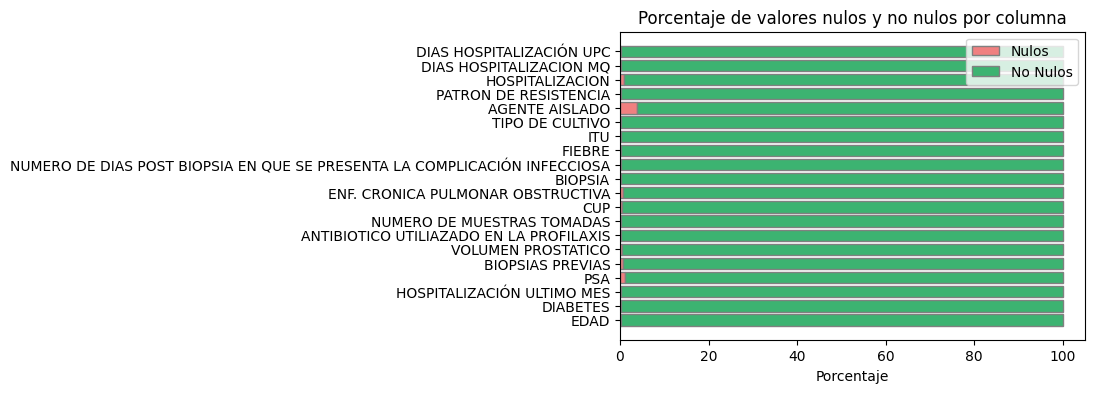

In [52]:
# Contar valores nulos y no nulos por columna
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Calcular los porcentajes
total_counts = null_counts + non_null_counts
null_percentage = (null_counts / total_counts) * 100
non_null_percentage = (non_null_counts / total_counts) * 100

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 4))

# Crear las barras apiladas
bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')  # Color rojo claro para nulos
bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='mediumseagreen', edgecolor='grey', label='No Nulos')  # Verde para no nulos

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje')
ax.set_title(f'Porcentaje de valores nulos y no nulos por columna')
ax.legend()

# Mostrar el gráfico
plt.show()


In [53]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in df.columns:
    print(f'Hay {df[column].isna().sum()} valores nulos en {column}')

Hay 1 valores nulos en EDAD
Hay 1 valores nulos en DIABETES
Hay 1 valores nulos en HOSPITALIZACIÓN ULTIMO MES
Hay 5 valores nulos en PSA
Hay 3 valores nulos en BIOPSIAS PREVIAS
Hay 2 valores nulos en VOLUMEN PROSTATICO
Hay 1 valores nulos en ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
Hay 1 valores nulos en NUMERO DE MUESTRAS TOMADAS
Hay 2 valores nulos en CUP
Hay 3 valores nulos en ENF. CRONICA PULMONAR OBSTRUCTIVA
Hay 1 valores nulos en BIOPSIA
Hay 1 valores nulos en NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
Hay 1 valores nulos en FIEBRE
Hay 1 valores nulos en ITU
Hay 1 valores nulos en TIPO DE CULTIVO
Hay 18 valores nulos en AGENTE AISLADO
Hay 1 valores nulos en PATRON DE RESISTENCIA
Hay 4 valores nulos en HOSPITALIZACION
Hay 1 valores nulos en DIAS HOSPITALIZACION MQ
Hay 1 valores nulos en DIAS HOSPITALIZACIÓN UPC


En principio se observa que todas las columnas tienen como mínimo 1 valor nulo y que la máxima cantidad de nulos es en la columna AGENTE AISLADO, con 18 valores 

In [54]:
cantidad_registros_nulos = len(df[df.isna().any(axis=1)])
porcentaje = round((cantidad_registros_nulos / len(df)) * 100,2)

print(f'Hay {cantidad_registros_nulos} registros con algún nulo, lo que representa el {porcentaje}% del total de registros')

Hay 28 registros con algún nulo, lo que representa el 6.07% del total de registros


Se tienen 28 registros donde hay al menos un valor nulo, esto representa el 6% de los registros disponibles, por lo que se decide borrarlos.

In [55]:
# Filtrar filas con valores nulos
df[df.isna().any(axis=1)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
70,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
86,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
93,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
94,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
97,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
100,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
103,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [56]:
# Elimino los valores nulos
df = df.dropna()

# Ahora identifico nuevamente la cantidad de valores nulos que qudaron en el dataset
for column in df.columns:
    print(f'Hay {df[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en EDAD
Hay 0 valores nulos en DIABETES
Hay 0 valores nulos en HOSPITALIZACIÓN ULTIMO MES
Hay 0 valores nulos en PSA
Hay 0 valores nulos en BIOPSIAS PREVIAS
Hay 0 valores nulos en VOLUMEN PROSTATICO
Hay 0 valores nulos en ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
Hay 0 valores nulos en NUMERO DE MUESTRAS TOMADAS
Hay 0 valores nulos en CUP
Hay 0 valores nulos en ENF. CRONICA PULMONAR OBSTRUCTIVA
Hay 0 valores nulos en BIOPSIA
Hay 0 valores nulos en NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
Hay 0 valores nulos en FIEBRE
Hay 0 valores nulos en ITU
Hay 0 valores nulos en TIPO DE CULTIVO
Hay 0 valores nulos en AGENTE AISLADO
Hay 0 valores nulos en PATRON DE RESISTENCIA
Hay 0 valores nulos en HOSPITALIZACION
Hay 0 valores nulos en DIAS HOSPITALIZACION MQ
Hay 0 valores nulos en DIAS HOSPITALIZACIÓN UPC


### Ahora veo los tipos de datos que tengo

In [57]:
def verificar_tipo_datos(df):
    '''
    Verifica el tipo de dato contenido en cada columna de un dataframe.
    Tiene como parámetro el dataframe a evaluar y devuelve un resumen de el/los tipos de datos.
    '''

    mi_dict = {"nombre_campo": [], "tipo_datos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
        
    return df_info

In [58]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos
0,EDAD,[<class 'float'>]
1,DIABETES,[<class 'str'>]
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>]
3,PSA,[<class 'float'>]
4,BIOPSIAS PREVIAS,[<class 'str'>]
5,VOLUMEN PROSTATICO,[<class 'str'>]
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>]
7,NUMERO DE MUESTRAS TOMADAS,[<class 'float'>]
8,CUP,[<class 'str'>]
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>]


Vamos a analizar la columnas que cuenta con dos tipos de datos diferentes

In [59]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique()

array([1, 2, 3, 5, 9, 'NO'], dtype=object)

Se puede observar que es una columna de números enteros pero al tener un 'NO' se combierte a dos tipo de datos.

Se procede a contar cuantos valores NO hay.

In [60]:
total_NO = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts().get('NO', 0)
total_filas = len(df)
porcentaje = round((total_NO / total_filas) * 100,2)

print(f'Hay un total de {total_filas} registros, de los cuales {total_NO} son "NO", lo que representa el {porcentaje}%')


Hay un total de 433 registros, de los cuales 408 son "NO", lo que representa el 94.23%


In [62]:
# Se analiza el valor 'NO' en el contexto de los demas datos.
df[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 'NO']

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
28,75.0,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
32,63.0,NO,NO,10.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55.0,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
453,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
454,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
455,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Al ver la cantidad de valores 'NO' que tiene la columna y comparado con la información de las otras columnas, se asume que NO significa que la persona no tuvo internación, por lo que se cambiará ese valor por 0 dias

In [63]:
# Se cambian los valores NO por 0
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)
# Se verifican los valores únicos y el tipo de dato
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique(), df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(type).unique()

(array([1, 2, 3, 5, 9, 0]), array([<class 'int'>], dtype=object))

Ahora a las columnas númericas se cambia el tipo de datos por el tipo de entero

In [64]:
# Se cambian los siguientes tipo de datos
df['EDAD'] = df['EDAD'].astype(int)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)

Se observa las variables categóricas de columnas para buscar unificar en caso de ser necesario

In [65]:
# Se revisan las categorías de la columna 
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO'],
      dtype=object)

In [66]:
# Se renombran
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 
                                                                                                      'FLUOROQUINOLONA_AMINOGLICOSIDO')


In [67]:
# Se revisan las categorías de la columna 
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI'], dtype=object)

In [68]:
# Se renombran
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 
                                                                                          'SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 
                                                                                          'SI')

In [69]:
# Se revisan las categorías de la columna 
df['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'ADENOCARCINOMA GLEASON 7',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [70]:
# Se renombran
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6 ',
                                      'ADENOCARCINOMA GLEASON 6')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ',
                                      'ADENOCARCINOMA GLEASON 7')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 8 ',
                                      'ADENOCARCINOMA GLEASON 8')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 9 ',
                                      'ADENOCARCINOMA GLEASON 9')
df['BIOPSIA'] = df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 10 ',
                                      'ADENOCARCINOMA GLEASON 10')

In [71]:
# Se revisan las categorías de la columna 
df['PATRON DE RESISTENCIA'].unique()

array(['NO', ' AMPI R, CIPRO R, GENTA R, SULFA M R',
       'RESISTENTE A AMPI, CIPRO Y GENTA',
       'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'MULTI SENSIBLE'], dtype=object)

In [72]:
# Se renombran
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 
                                                                  'R AMPI, R GENTA, R SULFA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 
                                                                  'R AMPI, R CIPRO, R GENTA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                  'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

In [73]:
verificar_tipo_datos(df)

,nombre_campo,tipo_datos
0,EDAD,[<class 'int'>]
1,DIABETES,[<class 'str'>]
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>]
3,PSA,[<class 'float'>]
4,BIOPSIAS PREVIAS,[<class 'str'>]
5,VOLUMEN PROSTATICO,[<class 'str'>]
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>]
7,NUMERO DE MUESTRAS TOMADAS,[<class 'int'>]
8,CUP,[<class 'str'>]
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>]


In [74]:
nombres_nuevos = {
    "EDAD": "Edad",
    "DIABETES": "Diabetes",
    "HOSPITALIZACIÓN ULTIMO MES": "Hospitaliz_ult_mes",
    "PSA": "PSA",
    "BIOPSIAS PREVIAS": "Biopsias_prev",
    "VOLUMEN PROSTATICO": "Vol_prostatico",
    "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "Antibiotico_en_profilaxis",
    "NUMERO DE MUESTRAS TOMADAS": "Nro_muestras",
    "CUP": "CUP",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA": "Epoc",
    "BIOPSIA": "Biopsia",
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": "Nro_dias_con_infecc",
    "FIEBRE": "Fiebre",
    "ITU": "ITU",
    "TIPO DE CULTIVO": "Tipo_cultivo",
    "AGENTE AISLADO": "Agente_aislado",
    "PATRON DE RESISTENCIA": "Patron_resistencia",
    "HOSPITALIZACION": "Hospitalizacion",
    "DIAS HOSPITALIZACION MQ": "Dias_hosp_mq",
    "DIAS HOSPITALIZACIÓN UPC": "Dias_hosp_upc"
}
df.rename(columns=nombres_nuevos, inplace=True)
df.head(3)

,Edad,Diabetes,Hospitaliz_ult_mes,PSA,Biopsias_prev,Vol_prostatico,Antibiotico_en_profilaxis,Nro_muestras,CUP,Epoc,Biopsia,Nro_dias_con_infecc,Fiebre,ITU,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hosp_mq,Dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
